In [1]:
import pandas as pd
import re
import json
import os

In [6]:
api_list = pd.read_csv("APIs List.csv")

In [7]:
api_list.sample(5)

,Num,Name,Use Case,Testing_Type,Type,Install command,Version,Last_version_release_date,Start_version,Start_version_release_date,Pypi url,Documentation,Github,Docs Type,API_Ref_File
27,28,json-tricks,deal with json,Unit-test,New_Version,pip install json-tricks,3.17.3,2023-08-19,1,2015-11-07,https://pypi.org/project/json-tricks/,https://json-tricks.readthedocs.io/en/latest/,https://github.com/mverleg/pyjson_tricks.git,body,total_content.txt
23,24,gymnasium,reinforcement learning,Manual,New_Version,pip install gymnasium,0.29.1,2023-08-21,0.0.1,2021-11-05,https://pypi.org/project/gymnasium/,https://gymnasium.farama.org/,https://github.com/Farama-Foundation/Gymnasium...,article,api.txt
28,29,pytorch-lightning,deep learning framework for pytorch,Manual,New_Version,pip install pytorch-lightning,2.0.7,2023-08-16,0.0.2,2019-03-31,https://pypi.org/project/pytorch-lightning/,https://lightning.ai/docs/pytorch/latest/,https://github.com/Lightning-AI/lightning.git,article,api.txt
12,13,linear-operator,PyTorch package for abstracting away the linea...,Unit-test,New_API,pip install linear-operator,0.5.1,2023-08-01,0.1.0,2022-08-11,https://pypi.org/project/linear-operator/,https://linear-operator.readthedocs.io/en/late...,https://github.com/cornellius-gp/linear_operat...,article,total_content.txt
46,47,tensorflow,constructing and executing a TensorFlow graph.,Manual,New_Version,pip install tensorflow,2.13.0,2023-07-05,0.12.0,2016-12-19,https://pypi.org/project/tensorflow/,https://www.tensorflow.org/api_docs/python/tf,https://github.com/tensorflow/tensorflow.git,article_absolute,api.txt


In [20]:
# loop over the dataframe
data = {}
for index, row in api_list.iterrows():
    file_path = 'data/'+row['Name']+'/'+row['API_Ref_File']
    # read the documentation content
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the entire contents of the file
        content = file.read()
        # Define a regular expression pattern for detecting image tags
        img_pattern = re.compile(r'!\[.*?\]\(.*?\)')

        # Use the sub() method to replace image tags with an empty string
        cleaned_text = re.sub(img_pattern, '', content)
        # cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        data[row['Name']] = cleaned_text.strip()

    with open(file_path[:-4]+"_cleaned.txt", 'w', encoding='utf-8') as file:
        file.write(cleaned_text)
    if not os.path.exists(file_path[:-4]):
        os.mkdir(file_path[:-4])
    data_split_list = cleaned_text.split('\n#')
    i = 0
    text = data_split_list[0]
    for data_i in data_split_list[1:]:
        if len(data_i.split()) < 100:
            text += "\n#" + data_i + "\n"
        else:
            with open(file_path[:-4]+"/"+str(i)+".txt", 'w', encoding='utf-8') as file:
                join = "#"+" ".join(data_i.split(" ")[:40])
                file.write(text+join.strip())
            text = data_i
            i += 1
    with open(file_path[:-4]+"/"+str(i)+".txt", 'w', encoding='utf-8') as file:
        file.write(text.strip())

with open("Documentation Data.json", 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, indent=2)

In [2]:
# Open the JSON file and load its contents
with open("Documentation Data.json", 'r') as file:
    data = json.load(file)

In [4]:
data.keys()

dict_keys(['PyDrive2', 'pytensor', 'ydata-profiling', 'langchain', 'diffusers', 'evaluate', 'argilla', 'llama-index', 'peft', 'rustworkx', 'pyglove', 'supervision', 'linear-operator', 'mmengine', 'apeye', 'bitstring', 'datacompy', 'emoji', 'chardet', 'click', 'category-encoders', 'scipy', 'xarray', 'gymnasium', 'datasets', 'hypothesis', 'ibis-framework', 'json-tricks', 'pytorch-lightning', 'rapidfuzz', 'mlflow', 'more-itertools', 'optuna', 'plotly', 'polars', 'Pygments', 'pypdf', 'holidays', 'jsonschema', 'validators', 'rich', 'spacy', 'stumpy', 'tox', 'pymc', 'SQLAlchemy', 'tensorflow', 'numpy', 'scikit-learn', 'pandas'])

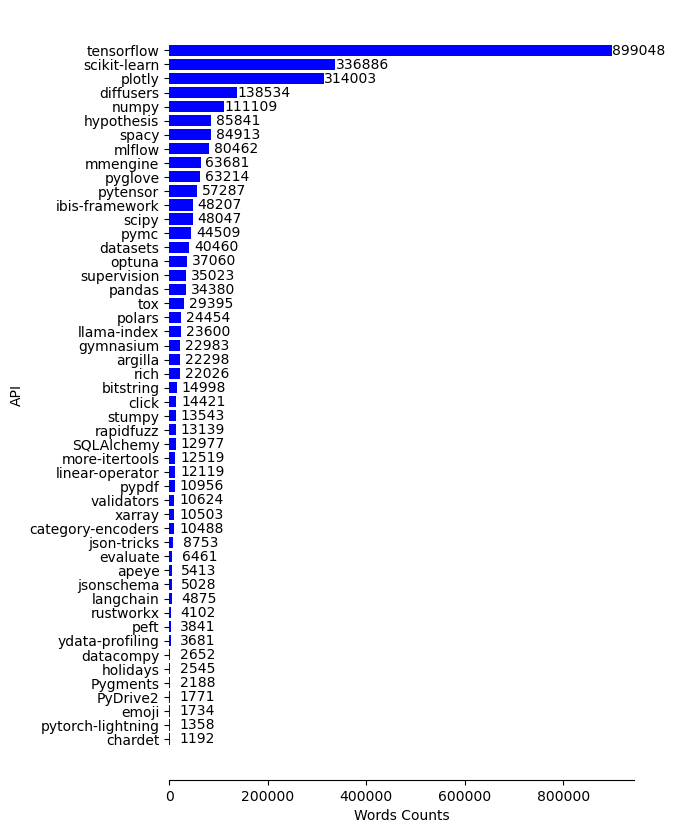

In [23]:
import matplotlib.pyplot as plt

lin_Nums = []
for k in data.keys():
    stri = data[k].split()
    lin_Nums.append(len(stri))    


sorted_data = sorted(zip(data.keys(), lin_Nums), key=lambda x: x[1])
apis = [x[0] for x in sorted_data]
lin_Nums = [x[1] for x in sorted_data]

plt.figure(figsize=(6, 10))
bars = plt.barh(apis, lin_Nums, color='blue')
plt.xlabel('Words Counts')
plt.ylabel('API')


plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


for bar, count in zip(bars, lin_Nums):
    plt.text( bar.get_width() + 55000, bar.get_y()-0.1, str(count),
             ha='center', va='bottom')


plt.show()

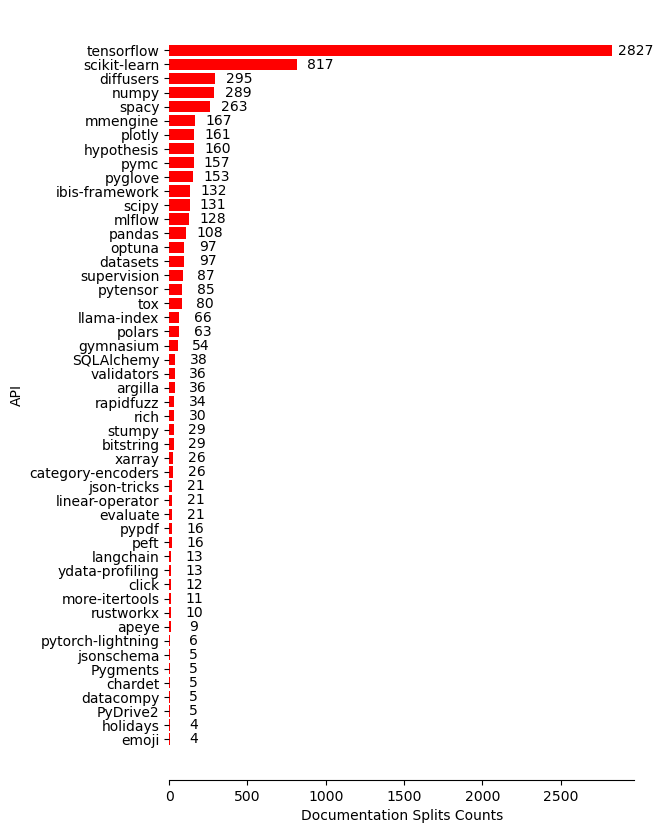

In [27]:
from pathlib import Path

files_Nums = []
for index, row in api_list.iterrows():
    file_path = Path('data/'+row['Name']+'/'+row['API_Ref_File'][:-4]+"/")
    files_Nums.append(len(list(file_path.glob('*'))))

sorted_data = sorted(zip(data.keys(), files_Nums), key=lambda x: x[1])
apis = [x[0] for x in sorted_data]
files_Nums = [x[1] for x in sorted_data]

plt.figure(figsize=(6, 10))
bars = plt.barh(apis, files_Nums, color='red')
plt.xlabel('Documentation Splits Counts')
plt.ylabel('API')


plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


for bar, count in zip(bars, files_Nums):
    plt.text( bar.get_width() + 150, bar.get_y()-0.1, str(count),
             ha='center', va='bottom')


plt.show()